In [96]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

# выбрать device на котором запускать
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# определение гиперпараметров 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Код из лекции

In [97]:
import random
import numpy

def set_seed(seed: int, n_gpu: int):
    random.seed(seed)
    numpy.random.seed(seed)
    torch.manual_seed(seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(seed)
        
set_seed(42, 1)

In [3]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root="../data", 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root="../data", 
                                          train=False, 
                                          transform=transforms.ToTensor())

# загрузка данных
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Во фреймворке PyTorch свертки могут быть одномерными, двумерными и трехмерными (реализуются модулями Conv1d, Conv2d
и Conv3d соответственно). Одномерная свертка удобна для работы с временными рядами, в которых каждому шагу по времени соответствует вектор признаков. В подобной ситуации можно обучаться паттернам в пространственном измерении последовательности. Большинство операций свертки в NLP одномерные. Двумерная свертка, с другой стороны, предназначена для улавливания пространственно-временных паттернов по двум направлениям в данных, например в изображениях — по осям высоты и ширины, вследствие чего двумерные свертки так часто применяются для обработки изображений. Аналогично в трехмерных свертках улавливаются пространственно-временные паттерны по трем направлениям в данных. Например, в видеоданных информация является трехмерной (два измерения отражают кадр изображения, а измерение времени отражает последовательность кадров). В этой книге мы в основном будем использовать Conv1d.

Еще один вариант функции активации — многомерная логистическая функция (softmax).

In [88]:
# Определение архитектуры нейронной сети
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
#         self.cnn1 = nn.Conv2d(input_size, hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x, apply_softmax=False):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
#         out = self.fc2(F.dropout(intermediate, p=0.5))
        if apply_softmax:
                out = F.softmax(out, dim=1)
        return out

In [89]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
model.train()

NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [90]:
# loss и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [91]:
# тренировка модели
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # перенос тензоров на определенный device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4680
Epoch [1/5], Step [200/600], Loss: 0.1552
Epoch [1/5], Step [300/600], Loss: 0.1444
Epoch [1/5], Step [400/600], Loss: 0.1614
Epoch [1/5], Step [500/600], Loss: 0.1575
Epoch [1/5], Step [600/600], Loss: 0.2093
Epoch [2/5], Step [100/600], Loss: 0.1018
Epoch [2/5], Step [200/600], Loss: 0.1508
Epoch [2/5], Step [300/600], Loss: 0.0842
Epoch [2/5], Step [400/600], Loss: 0.1363
Epoch [2/5], Step [500/600], Loss: 0.0720
Epoch [2/5], Step [600/600], Loss: 0.0304
Epoch [3/5], Step [100/600], Loss: 0.2167
Epoch [3/5], Step [200/600], Loss: 0.1531
Epoch [3/5], Step [300/600], Loss: 0.0153
Epoch [3/5], Step [400/600], Loss: 0.0840
Epoch [3/5], Step [500/600], Loss: 0.0904
Epoch [3/5], Step [600/600], Loss: 0.0445
Epoch [4/5], Step [100/600], Loss: 0.0814
Epoch [4/5], Step [200/600], Loss: 0.0308
Epoch [4/5], Step [300/600], Loss: 0.0194
Epoch [4/5], Step [400/600], Loss: 0.0764
Epoch [4/5], Step [500/600], Loss: 0.0173
Epoch [4/5], Step [600/600], Loss:

In [92]:
# переключение режима для инференса
model.eval()

NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [93]:
# тестирование модели
# не будем считать градиент, так как это инференс
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.95 %


Пока что лучший результат показала нейронка с параметрами как в лекции. Результат 97.9 %

Добавление в нейронную сеть слоя self.cnn1 = nn.Conv2d(input_size, hidden_size, num_classes) ухудшило на до 97.62 %

Функция активации SoftMax дает очень плохой результат - только 79.43 %

# Своя вариация

## Setting up the Environment

In [197]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets, transforms

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

#import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")

## Seed

In [198]:
import random
import numpy

def set_seed(seed: int, n_gpu: int):
    random.seed(seed)
    numpy.random.seed(seed)
    torch.manual_seed(seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(seed)
        
set_seed(42, 1)

## Load MNIST Dataset from TorchVision

In [199]:
# Define transform to normalize data
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                                ])



# Download and load the training data
train_set = datasets.MNIST('DATA_MNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [200]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(type(images)) # Checking the datatype 
print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


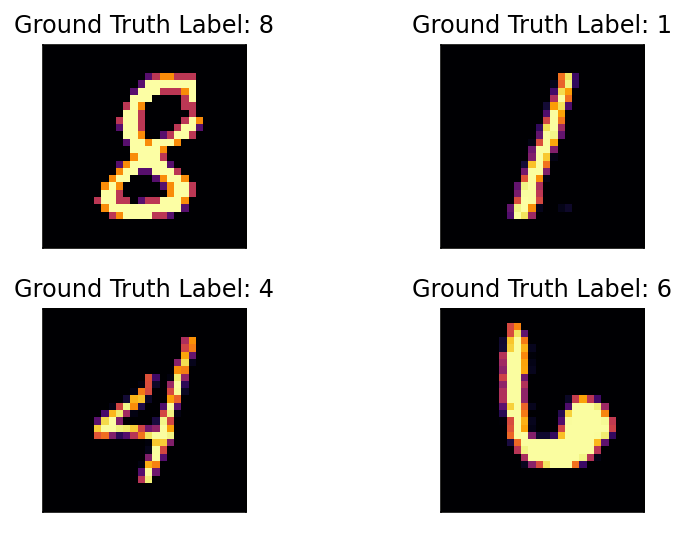

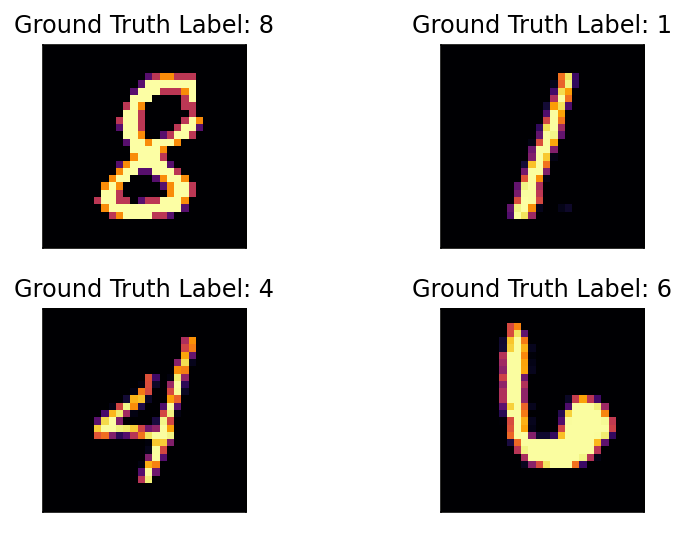

In [201]:
fig = plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Ground Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])
fig

## Building the Network

In [202]:
class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=1 because our input is a grayscale image
                nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                # After the first convolutional layer the output of this layer is:
                # [(28 + 2*1 - 3)/1] + 1 = 28. 
                nn.MaxPool2d(kernel_size=2), 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 28 / 2 = 14
          
                # output of our second conv layer
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                # After the second convolutional layer the output of this layer is:
                # [(14 + 2*1 - 3)/1] + 1 = 14. 
                nn.MaxPool2d(kernel_size=2) 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 14 / 2 = 7
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formular 
                # which is the output of each convolutional layer
                nn.Linear(in_features=24*7*7, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2), # Dropout with probability of 0.2 to avoid overfitting
                nn.Linear(in_features=64, out_features=10) # The output is 10 which should match the size of our class
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        # The softmax function returns the prob likelihood of getting the input image. 
        # We will see a much graphical demonstration below
        x = F.log_softmax(x, dim=1)
        return x

In [203]:
model = Network()
model.to(device)
print(model)

Network(
  (convolutaional_neural_network_layers): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [204]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

## Training and Testing the Model

In [205]:
epochs = 10 # The total number of iterations

train_losses = []
test_losses = []

for epoch in range(epochs):
    # prep model for training
    model.train()
    train_loss = 0

    for idx, (images, labels) in enumerate(trainloader): 

        # Send these >>> To GPU
        images = images.to(device)
        labels = labels.to(device)

        # Training pass
        optimizer.zero_grad()

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)

        #Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        
    else:
        # prep model for evaluation
        model.eval() 
        test_loss = 0
        accuracy = 0

        # Turn off the gradients when performing validation.
        # If we don't turn it off, we will comprise our networks weight entirely
        with torch.no_grad():
            for images, labels in testloader:
                
                images = images.to(device)
                labels = labels.to(device)
                
                log_probabilities = model(images)
                test_loss += criterion(log_probabilities, labels)

                probabilities = torch.exp(log_probabilities)
                top_prob, top_class = probabilities.topk(1, dim=1)
                predictions = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(predictions.type(torch.FloatTensor))
        
        train_losses.append(train_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}  ".format(epoch+1, epochs),
              "Training loss: {:.4f}  ".format(train_loss/len(trainloader)),
              "Testing loss: {:.4f}  ".format(test_loss/len(testloader)),
              "Test accuracy: {:.4f}  ".format(accuracy/len(testloader)))


Epoch: 1/10   Training loss: 0.7772   Testing loss: 0.2303   Test accuracy: 0.9286  
Epoch: 2/10   Training loss: 0.2411   Testing loss: 0.1411   Test accuracy: 0.9574  
Epoch: 3/10   Training loss: 0.1644   Testing loss: 0.0986   Test accuracy: 0.9688  
Epoch: 4/10   Training loss: 0.1309   Testing loss: 0.0813   Test accuracy: 0.9717  
Epoch: 5/10   Training loss: 0.1102   Testing loss: 0.0684   Test accuracy: 0.9780  
Epoch: 6/10   Training loss: 0.0977   Testing loss: 0.0568   Test accuracy: 0.9815  
Epoch: 7/10   Training loss: 0.0889   Testing loss: 0.0676   Test accuracy: 0.9765  
Epoch: 8/10   Training loss: 0.0812   Testing loss: 0.0599   Test accuracy: 0.9799  
Epoch: 9/10   Training loss: 0.0763   Testing loss: 0.0506   Test accuracy: 0.9822  
Epoch: 10/10   Training loss: 0.0708   Testing loss: 0.0498   Test accuracy: 0.9837  


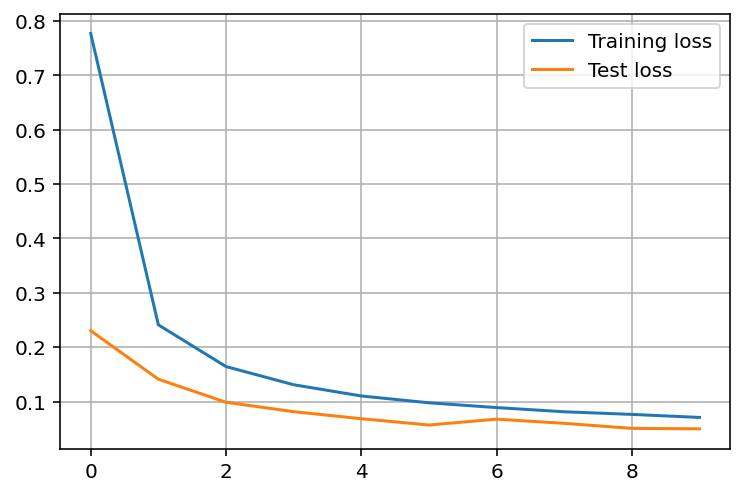

In [206]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.grid()

## Evaluating the Network

In [207]:
img = images[0]
img = img.to(device)
img = img.view(-1, 1, 28, 28)
print(img.shape)

# Since we want to use the already pretrained weights to make some prediction
# we are turning off the gradients
with torch.no_grad():
    logits = model.forward(img)

torch.Size([1, 1, 28, 28])


[1.2663250e-07 1.2572576e-02 9.8357350e-01 2.3181771e-03 2.1104914e-10
 3.6916251e-08 3.5996077e-08 3.0008753e-04 1.2356072e-03 1.3746155e-09]


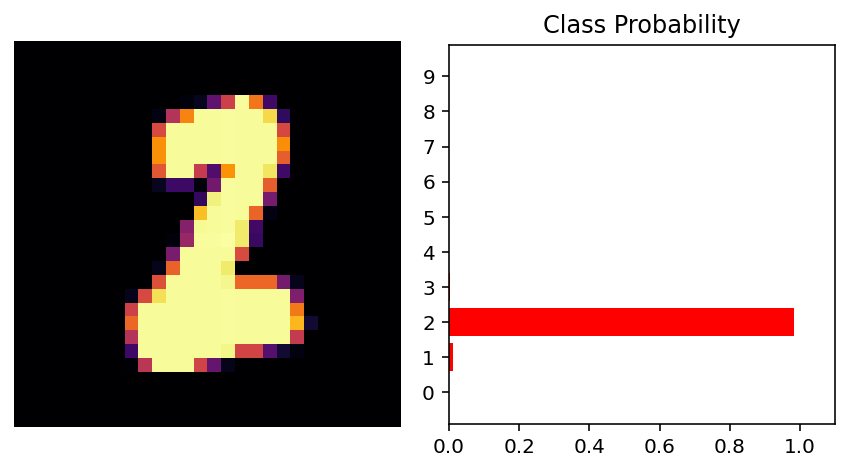

In [208]:
# We take the softmax for probabilites since our outputs are logits
probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
ax1.imshow(img.view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()